<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_5_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.376931,96.836391,85.653999,58.467444,0.564159,314.898923,314.578725,0.320198
1,0.0,1.0,35.489850,21.402241,44.351415,36.581070,-0.233962,147.590615,147.739079,-0.148464
2,0.0,2.0,23.711305,35.366176,56.060193,67.408355,-0.159961,192.386067,192.420829,-0.034762
3,0.0,3.0,84.874868,69.964673,48.435887,98.873349,-0.093887,312.054890,312.324116,-0.269226
4,0.0,4.0,52.670606,66.076694,54.369242,98.853387,-0.185380,281.784548,281.992924,-0.208376
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.952559,93.955252,47.534774,80.912283,0.110126,288.464994,288.165242,0.299752
119996,999.0,116.0,45.199357,91.974355,42.463040,57.115510,-0.718010,246.034252,246.438384,-0.404132
119997,999.0,117.0,69.679245,94.963488,32.184268,72.663296,0.319906,279.810204,279.225163,0.585041
119998,999.0,118.0,29.763750,64.983659,70.743891,28.265826,0.858664,204.615791,203.499020,1.116770


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.376931,96.836391,85.653999,58.467444,0.564159,314.898923,314.578725,0.320198
1,0.0,1.0,35.489850,21.402241,44.351415,36.581070,-0.233962,147.590615,147.739079,-0.148464
2,0.0,2.0,23.711305,35.366176,56.060193,67.408355,-0.159961,192.386067,192.420829,-0.034762
3,0.0,3.0,84.874868,69.964673,48.435887,98.873349,-0.093887,312.054890,312.324116,-0.269226
4,0.0,4.0,52.670606,66.076694,54.369242,98.853387,-0.185380,281.784548,281.992924,-0.208376
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.952559,93.955252,47.534774,80.912283,0.110126,288.464994,288.165242,0.299752
119996,999.0,116.0,45.199357,91.974355,42.463040,57.115510,-0.718010,246.034252,246.438384,-0.404132
119997,999.0,117.0,69.679245,94.963488,32.184268,72.663296,0.319906,279.810204,279.225163,0.585041
119998,999.0,118.0,29.763750,64.983659,70.743891,28.265826,0.858664,204.615791,203.499020,1.116770


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.376931,96.836391,85.653999,58.467444,0.564159,314.898923,314.578725,0.320198
1,0.0,1.0,35.489850,21.402241,44.351415,36.581070,-0.233962,147.590615,147.739079,-0.148464
2,0.0,2.0,23.711305,35.366176,56.060193,67.408355,-0.159961,192.386067,192.420829,-0.034762
3,0.0,3.0,84.874868,69.964673,48.435887,98.873349,-0.093887,312.054890,312.324116,-0.269226
4,0.0,4.0,52.670606,66.076694,54.369242,98.853387,-0.185380,281.784548,281.992924,-0.208376
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.952559,93.955252,47.534774,80.912283,0.110126,288.464994,288.165242,0.299752
119996,999.0,116.0,45.199357,91.974355,42.463040,57.115510,-0.718010,246.034252,246.438384,-0.404132
119997,999.0,117.0,69.679245,94.963488,32.184268,72.663296,0.319906,279.810204,279.225163,0.585041
119998,999.0,118.0,29.763750,64.983659,70.743891,28.265826,0.858664,204.615791,203.499020,1.116770


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

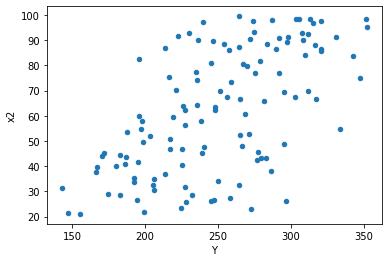

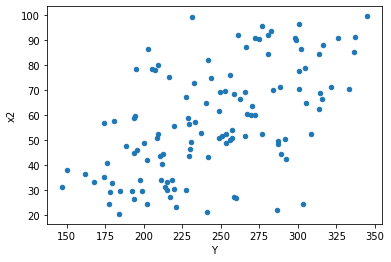

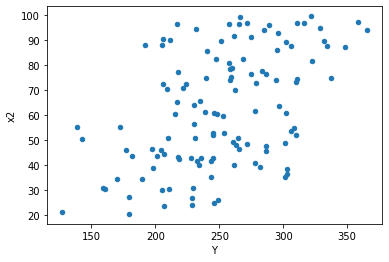

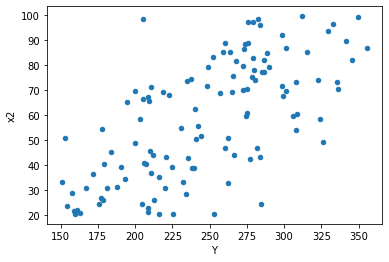

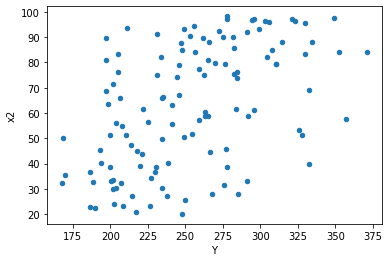

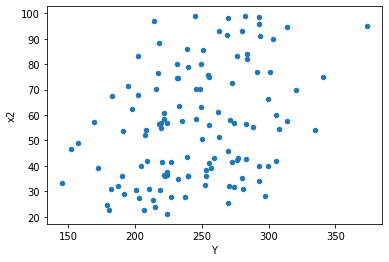

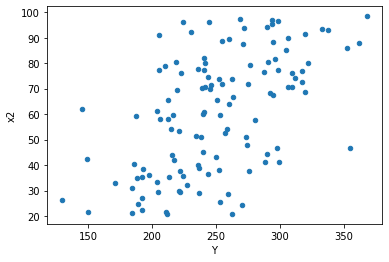

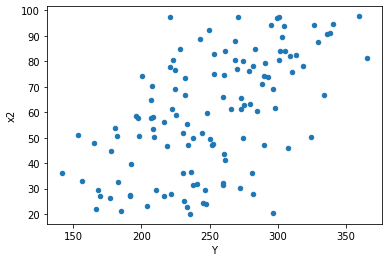

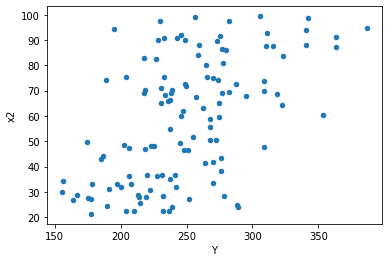

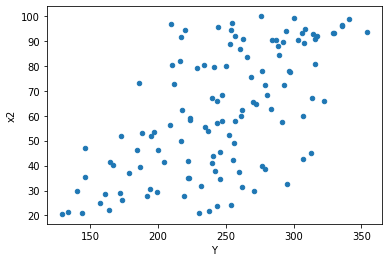

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,16.25968979654923,22.228016621435806,0.369538404467028,0.5051821959417229,1.3670627730027927,0.30346115322830336,0.8482694233858483,0.15173057661415168,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,20.8573157931842,22.080500797063472,0.47402990439055,0.5018295635696244,1.0586453700949856,0.850930386925064,0.574534806537468,0.425465193462532,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,18.19568150226584,19.719067732047826,0.4135382159605872,0.4481606302738142,1.083722405758327,0.7909198200880676,0.6045400899559662,0.3954599100440338,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,18.60767217875408,21.455178417225504,0.4229016404262291,0.48761769130057964,1.153028611591871,0.6387919185598263,0.6806040407200868,0.31939595927991316,Reject001=1 : Homoscedasticity
9.0,44.0,44.0,10.119229393642332,25.531600843969578,0.2299824862191439,0.5802636555447631,2.5230775833593087,0.0026963192404632075,0.9986518403797684,0.0013481596202316037,Reject001=0 : Heteroscedasticity
15.0,44.0,44.0,22.695717330821566,24.21086422655436,0.5158117575186719,0.5502469142398718,1.0667591543218233,0.8312451278893063,0.5843774360553469,0.41562256394465313,Reject001=1 : Homoscedasticity
18.0,44.0,44.0,16.00973932884348,21.465469001755057,0.36385771201917,0.48785156822170583,1.340775671661463,0.3343593788218111,0.8328203105890944,0.16717968941090555,Reject001=1 : Homoscedasticity
19.0,44.0,44.0,17.166760485093445,18.559383153714336,0.3901536473884874,0.4218041625844167,1.0811232072486918,0.7970240547459098,0.6014879726270451,0.3985120273729549,Reject001=1 : Homoscedasticity
22.0,44.0,44.0,19.69252812316368,27.614591586273345,0.4475574573446291,0.6276043542334852,1.4022877821254043,0.26596992170524425,0.8670150391473779,0.13298496085262212,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,16.25968979654923,22.228016621435806,0.369538404467028,0.5051821959417229,1.3670627730027927,0.30346115322830336,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,20.8573157931842,22.080500797063472,0.47402990439055,0.5018295635696244,1.0586453700949856,0.850930386925064,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,29.055795456663255,19.996547453131654,0.6603589876514376,0.454466987571174,0.6882120120564768,0.21917395458288244,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,26.771511589420907,22.11285087804318,0.6084434452141115,0.5025647926827995,0.825984397787286,0.5286933868995618,Reject001=1 : Homoscedasticity
4.0,44.0,44.0,24.845260820147836,22.899347908202785,0.5646650186397235,0.5204397251864269,0.9216787086265141,0.7879837406705034,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,24.096178019090328,15.05887584329177,0.5476404095247802,0.34224717825663115,0.6249487296849024,0.12276869597175913,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,18.19568150226584,19.719067732047826,0.4135382159605872,0.4481606302738142,1.083722405758327,0.7909198200880676,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,18.60767217875408,21.455178417225504,0.4229016404262291,0.48761769130057964,1.153028611591871,0.6387919185598263,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,22.626669164275302,14.18506812227777,0.5142424810062569,0.3223879118699493,0.6269180858786864,0.1252712475852756,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64